In [1]:
### Put your NAME and EID here: Ari Takvorian (abt734)

# Problem Set 01b

In this first assignment, we want you to get familiar with jupyter notebooks as well as common Python packages that will be used in this class. If you need any help, refer to the documentation hints for the problems.

Make sure you have the following packages installed for Python3:

- numpy
- matplotlib

In [2]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# setting seed, DON'T modify
np.random.seed(10)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [3]:
# no need to modify this
def poly_feature(X,poly = 1):
    # expects an array (X) of shape (n,1)
    newX = []
    for i in range(poly+1):
        newX.append(X**i)
    return np.concatenate(newX, axis=1)

## Problem 1: Linear Regression

For this problem, we will be exploring a simple linear regression example. The data can be found in **ps01.data**.

### Part A.

We want you to:

- First load in the dataset (**ps01.data**) using numpy. 

    - The structure will be a little different than last homework. After using **np.load**, call **.item()** on the object.
    - If done correctly, you should see a dictionary containing the keys **("Xtrain,"Xtest","Ytrain","Ytest")**.
    
    
- Plot both the train and test data (on the same plot), each with a different color. Make sure to include a legend.


Useful modules:
    - np.load
    - plt.scatter, plt.legend


Text(0.5, 1.0, 'Testing and Training Data Scatterplot')

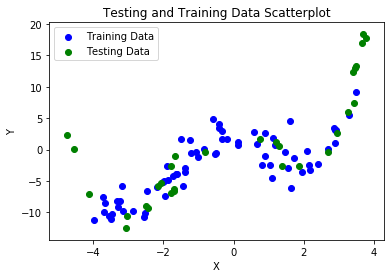

In [4]:
# code here
data = np.load('ps01.data', allow_pickle=True)
data = data.item(0)

plt.scatter(data['Xtrain'], data['Ytrain'], c='b', label='Training Data')
plt.scatter(data['Xtest'], data['Ytest'], c='g', label='Testing Data')
plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Testing and Training Data Scatterplot')

### Part B.

We can notice a positive correlation from the previous plot. Thus, let's try to learn a simple linear regression model:

$$y^{(i)} \approx \hat{y}^{(i)} = \beta_0 + \beta_1 x^{(i)}$$

Recall the objective to find the optimal $\beta$:

$$ \min_\beta \sum_i ||y - X\beta||^2 $$

We want you to now:

- Solve for $\beta$ ONLY using **Xtrain** and **Ytrain**. 
    - Make sure to use the right formula. (Does n>d or n<d?)
    - Don't forget to include the extra "1" term in your features to include $\beta_0$. 
    - We have included a function you may use to do this.
    
- Overlay the line with the original data points in a **new plot**.
    - You will want to create a **continuous line** (rather than scatterplot) for the linear regression model.
    - Make sure to include the **test data** in the scatter plot as well.
    - Include a legend labeling each part of the plot.
    
- Does this model fit the test data well? Calculate the **test set error** using the following formula:

$$ E = \frac{1}{n}\sum_{i=1}^n || y^{(i)} - \hat{y}^{(i)} || ^ 2 $$

- Also calculate **both** the **train** and **test** $R^2$ statistic:

$$ R^2 = 1 - \frac{\sum_{i=1}^n ( y^{(i)} - \hat{y}^{(i)} ) ^ 2}{\sum_{i=1}^n (y^{(i)}-\bar{y}) ^ 2} $$

Useful modules:
    - poly_feature
    - np.linalg.inv
    - np.transpose
    - np.linspace
    - np.mean
    - plt.scatter
    - plt.legend

Test Set Error:  38.29023113306527
Test R^2:  [0.48565556]
Train R^2:  [0.55481092]


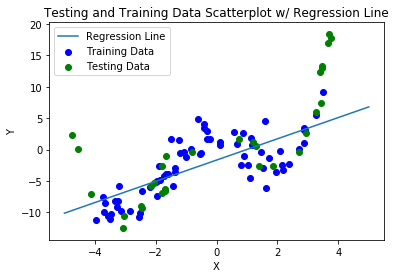

In [5]:
# code here

features = poly_feature(data['Xtrain'])
beta = np.dot((np.transpose(features)), features)
beta = np.linalg.inv(beta)
beta = np.dot(beta, np.transpose(features))
beta = np.dot(beta, data['Ytrain'])

plt.scatter(data['Xtrain'], data['Ytrain'], c='b', label='Training Data')
plt.scatter(data['Xtest'], data['Ytest'], c='g', label='Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Testing and Training Data Scatterplot w/ Regression Line')
line = np.linspace(-5, 5, 100)
plt.plot(line, line*beta[1] + beta[0], label = 'Regression Line')
plt.legend(loc='upper left')

error = 0
for i in range(0, len(data['Xtest'])):
    error = error + (np.linalg.norm(data['Ytest'][i] - (beta[0]+beta[1]*data['Xtest'][i])))**2

error = error/len(data['Xtest'])

numeratortrain = 0
denominatortrain = 0
ybartrain = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    numeratortrain = numeratortrain + (data['Ytrain'][i] - (beta[0]+beta[1]*data['Xtrain'][i]))**2
    denominatortrain = denominatortrain + (data['Ytrain'][i] - ybartrain)**2

trainr = 1- (numeratortrain/denominatortrain)

numeratortest = 0
denominatortest = 0
ybartest = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    numeratortest = numeratortest + (data['Ytest'][i] - (beta[0]+beta[1]*data['Xtest'][i]))**2
    denominatortest = denominatortest + (data['Ytest'][i] - ybartest)**2

testr = 1- (numeratortest/denominatortest)

print('Test Set Error: ', error)
print('Test R^2: ', testr)
print('Train R^2: ', trainr)

### Part C.

We clearly need a more complex model -- luckily, we can still use linear regression, i.e. only solve for a new $\beta$.

One way to do this is to use non-linear features in our model. One such example is to also include a quadratic term.

$$y^{(i)} \approx \hat{y}^{(i)} = \beta_0 + \beta_1 x^{(i)} + \beta_2 ({x^{(i)}})^2$$

This can still be solved using least squares, since $\beta$ is still linear w.r.t. our quadratic term. We can further extend this to any power $d$: 

$$\hat{y}^{(i)} = \beta_0 + \beta_1 x^{(i)} +\ ...\ + \beta_d (x^{(i)})^d$$

Thus, in this part, we want you to:

- Solve for $\beta$ using $d = [2,3,4,5,6,7]$.

    - Similar to the previous, you can make use of **poly_feature** to generate the features.

- Overlay each new model (each polynomial of degree **d** with coefficients $\beta$) over the train and test data.
    
    - There should only be **one figure**. It will be similar to part B but with 9 continuous lines (rather than 1).
    - Make sure to **label each** in a legend.
    - We suggest setting a **limit** on the y-axis to stay within [-20,20].

- Calculate **test errors** $E_d$ for each d. Plot out an E vs. d plot.

- Calculate **train** and **test** $R^2$ for each d. 
    - Using **only 1** figure, graph **BOTH** the **train** and **test** R2 vs $d$.
    - This should contain **two** solid lines that are labeled with a color. Please include a legend denoting train/test.

- Using these plots, what value of $d$ do you think the data came from? 
    

Useful modules:
    - poly_feature
    - np.linalg.inv
    - np.transpose
    - np.linspace
    - np.mean
    - plt.scatter
    - plt.legend
    - plt.ylim

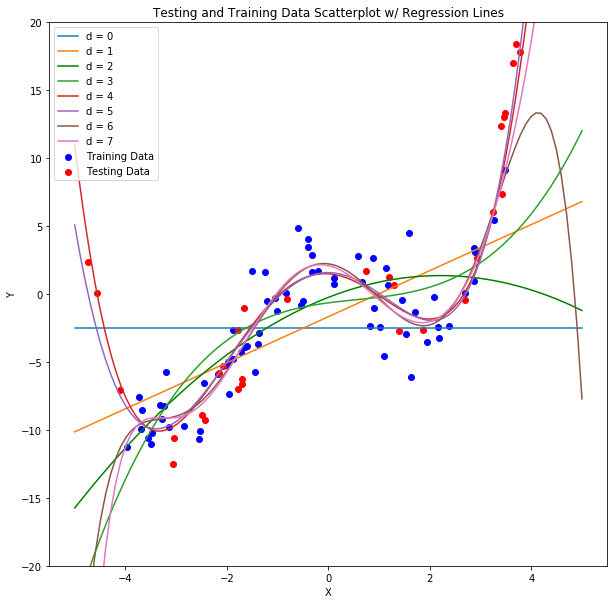

In [13]:
# code here

zero = poly_feature(data['Xtrain'], 0)
one = poly_feature(data['Xtrain'], 1)
two = poly_feature(data['Xtrain'], 2)
three = poly_feature(data['Xtrain'], 3)
four = poly_feature(data['Xtrain'], 4)
five = poly_feature(data['Xtrain'], 5)
six = poly_feature(data['Xtrain'], 6)
seven = poly_feature(data['Xtrain'], 7)

features = [zero, one, two, three, four, five, six, seven]
betas = []

for i in features:
    beta = np.dot((np.transpose(i)), i)
    beta = np.linalg.inv(beta)
    beta = np.dot(beta, np.transpose(i))
    beta = np.dot(beta, data['Ytrain'])
    betas.append(beta)
    
plt.figure(figsize=(10,10))
    
plt.scatter(data['Xtrain'], data['Ytrain'], c='b', label='Training Data')
plt.scatter(data['Xtest'], data['Ytest'], c='r', label='Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-20, 20)

plt.title('Testing and Training Data Scatterplot w/ Regression Lines')
line = np.linspace(-5, 5, 100)

plt.plot(line, line*0+betas[0][0], label = 'd = 0')
plt.plot(line, betas[1][0] + line*betas[1][1], label = 'd = 1')
plt.plot(line, betas[2][0] + line*betas[2][1] + (line**2)*betas[2][2], label = 'd = 2', c='g')
plt.plot(line, betas[3][0] + line*betas[3][1] + (line**2)*betas[3][2] + (line**3)*betas[3][3], label='d = 3')
plt.plot(line, betas[4][0] + line*betas[4][1] + (line**2)*betas[4][2] + (line**3)*betas[4][3] + (line**4)*betas[4][4], label = 'd = 4')
plt.plot(line, betas[5][0] + line*betas[5][1] + (line**2)*betas[5][2] + (line**3)*betas[5][3] + (line**4)*betas[5][4] + (line**5)*betas[5][5], label = 'd = 5')
plt.plot(line, betas[6][0] + line*betas[6][1] + (line**2)*betas[6][2] + (line**3)*betas[6][3] + (line**4)*betas[6][4] + (line**5)*betas[6][5] + (line**6)*betas[6][6], label = 'd = 6')
plt.plot(line, betas[7][0] + line*betas[7][1] + (line**2)*betas[7][2] + (line**3)*betas[7][3] + (line**4)*betas[7][4] + (line**5)*betas[7][5] + (line**6)*betas[7][6] + (line**7)*betas[7][7], label = 'd = 7')
plt.legend(loc='upper left')

Test Error (d = 0):  85.70636091521732
Test Error (d = 1):  38.29023113306527
Test Error (d = 2):  66.93970899762827
Test Error (d = 3):  62.605671427579225
Test Error (d = 4):  3.9878737628026295
Test Error (d = 5):  4.107329031006091
Test Error (d = 6):  42.810187106409835
Test Error (d = 7):  75.70142282327564


Text(0, 0.5, 'Test Error')

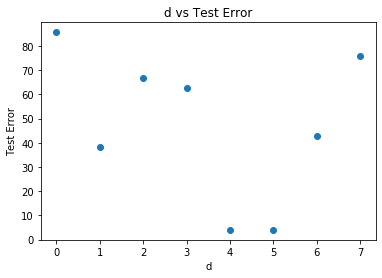

In [7]:
errors = []

error_zero = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[0][0])
    y = data['Ytest'][i]
    error_zero = error_zero + (np.linalg.norm(y - ybar))**2
error_zero = error_zero/len(data['Xtest'])
errors.append(error_zero)

error_one = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[1][0] + betas[1][1]*data['Xtest'][i])
    y = data['Ytest'][i]
    error_one = error_one + (np.linalg.norm(y - ybar))**2
error_one = error_one/len(data['Xtest'])
errors.append(error_one)

error_two = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[2][0] + betas[2][1]*data['Xtest'][i] + betas[2][2]*(data['Xtest'][i]**2))
    y = data['Ytest'][i]
    error_two = error_two + (np.linalg.norm(y - ybar))**2
error_two = error_two/len(data['Xtest'])
errors.append(error_two)

error_three = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[3][0] + betas[3][1]*data['Xtest'][i] + betas[3][2]*(data['Xtest'][i]**2)+ betas[3][3]*(data['Xtest'][i]**3))
    y = data['Ytest'][i]
    error_three = error_three + (np.linalg.norm(y - ybar))**2
error_three = error_three/len(data['Xtest'])
errors.append(error_three)

error_four = 0
for i in range(0, len(data['Xtrain'])):
    ybar = (betas[4][0] + betas[4][1]*data['Xtrain'][i] + betas[4][2]*(data['Xtrain'][i]**2)+ betas[4][3]*(data['Xtrain'][i]**3) + betas[4][4]*(data['Xtrain'][i]**4))
    y = data['Ytrain'][i]
    error_four = error_four + (np.linalg.norm(y - ybar))**2
error_four = error_four/len(data['Xtrain'])
errors.append(error_four)

error_five = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[5][0] + betas[5][1]*data['Xtest'][i] + betas[5][2]*(data['Xtest'][i]**2)+ betas[5][3]*(data['Xtest'][i]**3) + betas[5][4]*(data['Xtest'][i]**4) + betas[5][5]*(data['Xtest'][i]**5))
    y = data['Ytest'][i]
    error_five = error_five + (np.linalg.norm(y - ybar))**2
error_five = error_five/len(data['Xtest'])
errors.append(error_five)

error_six = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[6][0] + betas[6][1]*data['Xtest'][i] + betas[6][2]*(data['Xtest'][i]**2)+ betas[6][3]*(data['Xtest'][i]**3) + betas[6][4]*(data['Xtest'][i]**4) + betas[6][5]*(data['Xtest'][i]**5) + betas[6][6]*(data['Xtest'][i]**6))
    y = data['Ytest'][i]
    error_six = error_six + (np.linalg.norm(y - ybar))**2
error_six = error_six/len(data['Xtest'])
errors.append(error_six)

error_seven  = 0
for i in range(0, len(data['Xtest'])):
    ybar = (betas[7][0] + betas[7][1]*data['Xtest'][i] + betas[7][2]*(data['Xtest'][i]**2)+ betas[7][3]*(data['Xtest'][i]**3) + betas[7][4]*(data['Xtest'][i]**4) + betas[7][5]*(data['Xtest'][i]**5) + betas[7][6]*(data['Xtest'][i]**6) + betas[7][7]*(data['Xtest'][i]**7))
    y = data['Ytest'][i]
    error_seven = error_seven + (np.linalg.norm(y - ybar))**2
error_seven = error_seven/len(data['Xtest'])
errors.append(error_seven)

print('Test Error (d = 0): ', error_zero)
print('Test Error (d = 1): ', error_one)
print('Test Error (d = 2): ', error_two)
print('Test Error (d = 3): ', error_three)
print('Test Error (d = 4): ', error_four)
print('Test Error (d = 5): ', error_five)
print('Test Error (d = 6): ', error_six)
print('Test Error (d = 7): ', error_seven)

x_range = [0, 1, 2, 3, 4, 5, 6, 7]

plt.scatter(x_range, errors)
plt.title('d vs Test Error')
plt.xlabel('d')
plt.ylabel('Test Error')

In [8]:
train_rs = []
test_rs = []

In [200]:
ntrain_zero = 0
dtrain_zero = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[0][0])
    ntrain_zero += (y-yhat)**2
    dtrain_zero += (y - ybar)**2

rtrain_zero = 1 - (ntrain_zero/dtrain_zero)

ntest_zero = 0
dtest_zero = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[0][0])
    ntest_zero += (y-yhat)**2
    dtest_zero += (y - ybar)**2

rtest_zero = 1 - (ntest_zero/dtest_zero)

In [201]:
ntrain_one = 0
dtrain_one = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[1][0] + betas[1][1]*data['Xtrain'][i])
    ntrain_one += (y-yhat)**2
    dtrain_one += (y - ybar)**2

rtrain_one = 1 - (ntrain_one/dtrain_one)

ntest_one = 0
dtest_one = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[1][0] + betas[1][1]*data['Xtest'][i])
    ntest_one += (y-yhat)**2
    dtest_one += (y - ybar)**2

rtest_one = 1 - (ntest_one/dtest_one)

In [202]:
ntrain_two = 0
dtrain_two = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[2][0] + betas[2][1]*data['Xtrain'][i]+ betas[2][2]*(data['Xtrain'][i]**2))
    ntrain_two += (y-yhat)**2
    dtrain_two += (y - ybar)**2

rtrain_two = 1 - (ntrain_two/dtrain_two)

ntest_two = 0
dtest_two = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[2][0] + betas[2][1]*data['Xtest'][i]+ betas[2][2]*(data['Xtest'][i]**2))
    ntest_two += (y-yhat)**2
    dtest_two += (y - ybar)**2

rtest_two = 1 - (ntest_two/dtest_two)

In [203]:
ntrain_three = 0
dtrain_three = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[3][0] + betas[3][1]*data['Xtrain'][i]+ betas[3][2]*(data['Xtrain'][i]**2) + betas[3][3]*(data['Xtrain'][i]**3))
    ntrain_three += (y-yhat)**2
    dtrain_three += (y - ybar)**2

rtrain_three = 1 - (ntrain_three/dtrain_three)

ntest_three = 0
dtest_three = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[3][0] + betas[3][1]*data['Xtest'][i]+ betas[3][2]*(data['Xtest'][i]**2) + betas[3][3]*(data['Xtest'][i]**3))
    ntest_three += (y-yhat)**2
    dtest_three += (y - ybar)**2

rtest_three = 1 - (ntest_three/dtest_three)

In [204]:
ntrain_four = 0
dtrain_four = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[4][0] + betas[4][1]*data['Xtrain'][i]+ betas[4][2]*(data['Xtrain'][i]**2) + betas[4][3]*(data['Xtrain'][i]**3) + betas[4][4]*(data['Xtrain'][i]**4))
    ntrain_four += (y-yhat)**2
    dtrain_four += (y - ybar)**2

rtrain_four = 1 - (ntrain_four/dtrain_four)

ntest_four = 0
dtest_four = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[4][0] + betas[4][1]*data['Xtest'][i]+ betas[4][2]*(data['Xtest'][i]**2) + betas[4][3]*(data['Xtest'][i]**3) + betas[4][4]*(data['Xtest'][i]**4))
    ntest_four += (y-yhat)**2
    dtest_four += (y - ybar)**2

rtest_four = 1 - (ntest_four/dtest_four)

In [205]:
ntrain_five = 0
dtrain_five = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[5][0] + betas[5][1]*data['Xtrain'][i]+ betas[5][2]*(data['Xtrain'][i]**2) + betas[5][3]*(data['Xtrain'][i]**3) + betas[5][4]*(data['Xtrain'][i]**4) + betas[5][5]*(data['Xtrain'][i]**5))
    ntrain_five += (y-yhat)**2
    dtrain_five += (y - ybar)**2

rtrain_five = 1 - (ntrain_five/dtrain_five)

ntest_five = 0
dtest_five = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[5][0] + betas[5][1]*data['Xtest'][i]+ betas[5][2]*(data['Xtest'][i]**2) + betas[5][3]*(data['Xtest'][i]**3) + betas[5][4]*(data['Xtest'][i]**4) + betas[5][5]*(data['Xtest'][i]**5))
    ntest_five += (y-yhat)**2
    dtest_five += (y - ybar)**2

rtest_five = 1 - (ntest_five/dtest_five)

In [206]:
ntrain_six = 0
dtrain_six = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[6][0] + betas[6][1]*data['Xtrain'][i]+ betas[6][2]*(data['Xtrain'][i]**2) + betas[6][3]*(data['Xtrain'][i]**3) + betas[6][4]*(data['Xtrain'][i]**4) + betas[6][5]*(data['Xtrain'][i]**5) + betas[6][6]*(data['Xtrain'][i]**6))
    ntrain_six += (y-yhat)**2
    dtrain_six += (y - ybar)**2

rtrain_six = 1 - (ntrain_six/dtrain_six)

ntest_six = 0
dtest_six = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[6][0] + betas[6][1]*data['Xtest'][i]+ betas[6][2]*(data['Xtest'][i]**2) + betas[6][3]*(data['Xtest'][i]**3) + betas[6][4]*(data['Xtest'][i]**4) + betas[6][5]*(data['Xtest'][i]**5) + betas[6][6]*(data['Xtest'][i]**6))
    ntest_six += (y-yhat)**2
    dtest_six += (y - ybar)**2

rtest_six = 1 - (ntest_six/dtest_six)

In [207]:
ntrain_seven = 0
dtrain_seven = 0
ybar = np.mean(data['Ytrain'])
for i in range(0, len(data['Xtrain'])):
    y = data['Ytrain'][i]
    yhat = (betas[7][0] + betas[7][1]*data['Xtrain'][i]+ betas[7][2]*(data['Xtrain'][i]**2) + betas[7][3]*(data['Xtrain'][i]**3) + betas[7][4]*(data['Xtrain'][i]**4) + betas[7][5]*(data['Xtrain'][i]**5) + betas[7][6]*(data['Xtrain'][i]**6) + betas[7][7]*(data['Xtrain'][i]**7))
    ntrain_seven += (y-yhat)**2
    dtrain_seven += (y - ybar)**2

rtrain_seven = 1 - (ntrain_seven/dtrain_seven)

ntest_seven = 0
dtest_seven = 0
ybar = np.mean(data['Ytest'])
for i in range(0, len(data['Xtest'])):
    y = data['Ytest'][i]
    yhat = (betas[7][0] + betas[7][1]*data['Xtest'][i]+ betas[7][2]*(data['Xtest'][i]**2) + betas[7][3]*(data['Xtest'][i]**3) + betas[7][4]*(data['Xtest'][i]**4) + betas[7][5]*(data['Xtest'][i]**5) + betas[7][6]*(data['Xtest'][i]**6) + betas[7][7]*(data['Xtest'][i]**7))
    ntest_seven += (y-yhat)**2
    dtest_seven += (y - ybar)**2

rtest_seven = 1 - (ntest_seven/dtest_seven)

Training R^2 for d=0:  0.0 Testing R^2 for d=0:  -0.15127511825781492
Training R^2 for d=1:  0.5548109226399691 Testing R^2 for d=1:  0.48565555805774685
Training R^2 for d=2:  0.6345726016798344 Testing R^2 for d=2:  0.10081328189136785
Training R^2 for d=3:  0.6742343952481986 Testing R^2 for d=3:  0.15903147669872775
Training R^2 for d=4:  0.8259709260062404 Testing R^2 for d=4:  0.9386775078211066
Training R^2 for d=5:  0.8271318337303141 Testing R^2 for d=5:  0.9448271322524942
Training R^2 for d=6:  0.8428295766215654 Testing R^2 for d=6:  0.42493996131364975
Training R^2 for d=7:  0.8440011698836462 Testing R^2 for d=7:  -0.016880936052872553


Text(0.5, 1.0, 'R^2 values for Training and Testing Data given d')

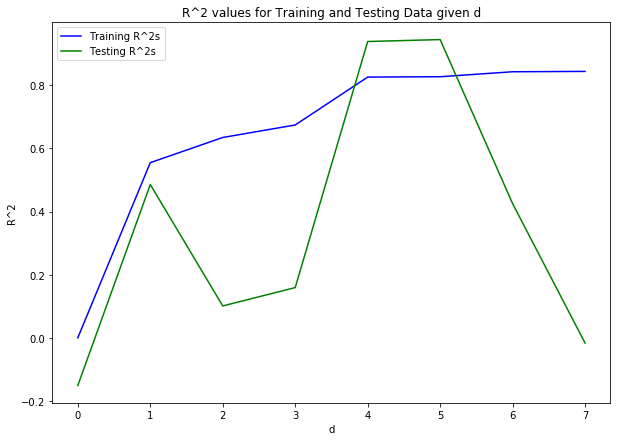

In [221]:
train_rs = [rtrain_zero[0], rtrain_one[0], rtrain_two[0], rtrain_three[0], rtrain_four[0], rtrain_five[0], rtrain_six[0], rtrain_seven[0]]
test_rs = [rtest_zero[0], rtest_one[0], rtest_two[0], rtest_three[0], rtest_four[0], rtest_five[0], rtest_six[0], rtest_seven[0]]

print('Training R^2 for d=0: ', train_rs[0], 'Testing R^2 for d=0: ', test_rs[0])
print('Training R^2 for d=1: ', train_rs[1], 'Testing R^2 for d=1: ', test_rs[1])
print('Training R^2 for d=2: ', train_rs[2], 'Testing R^2 for d=2: ', test_rs[2])
print('Training R^2 for d=3: ', train_rs[3], 'Testing R^2 for d=3: ', test_rs[3])
print('Training R^2 for d=4: ', train_rs[4], 'Testing R^2 for d=4: ', test_rs[4])
print('Training R^2 for d=5: ', train_rs[5], 'Testing R^2 for d=5: ', test_rs[5])
print('Training R^2 for d=6: ', train_rs[6], 'Testing R^2 for d=6: ', test_rs[6])
print('Training R^2 for d=7: ', train_rs[7], 'Testing R^2 for d=7: ', test_rs[7])


plt.plot(x_range, train_rs, label='Training R^2s', c='b')
plt.plot(x_range, test_rs, label='Testing R^2s', c='g')
plt.xlabel('d')
plt.ylabel('R^2')
plt.legend(loc='upper left')
plt.title('R^2 values for Training and Testing Data given d')
  

Given the values for R^2 for training and testing data, as well as the values for testing error, it seems that d=5 is the best estimate for the true order of the data

## Turn in Instructions

Once you have completed Problems 1 and 2, please submit (for this part of the assignment):

- This .ipynb file.
- A PDF version of this file. To do this:
    1. Go to File -> Download as -> HTML
    2. Open the HTML and Print, and change the **destination** to **PDF**.